# Employee Attrition Classification Dataset

https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset

-   The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.



---

### 🧾 **Employee Dataset Feature Summary**

| Feature                   | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `Employee ID`             | Unique identifier for each employee                                         |
| `Age`                     | Age of the employee (18–60 years)                                           |
| `Gender`                  | Gender of the employee                                                      |
| `Years at Company`        | Number of years the employee has worked at the company                      |
| `Monthly Income`          | Monthly salary in dollars                                                   |
| `Job Role`                | Department or role (e.g., Finance, Healthcare, Technology, Education, Media)|
| `Work-Life Balance`       | Perceived balance: Poor, Below Average, Good, Excellent                     |
| `Job Satisfaction`        | Satisfaction level: Very Low, Low, Medium, High                             |
| `Performance Rating`      | Performance: Low, Below Average, Average, High                              |
| `Number of Promotions`    | Total number of promotions received                                         |
| `Distance from Home`      | Distance to workplace in miles                                              |
| `Education Level`         | Highest education: High School, Associate, Bachelor’s, Master’s, PhD        |
| `Marital Status`          | Marital status: Divorced, Married, Single                                   |
| `Job Level`               | Job level: Entry, Mid, Senior                                               |
| `Company Size`            | Size of company: Small, Medium, Large                                       |
| `Company Tenure`          | Total years in the industry                                                 |
| `Remote Work`             | Works remotely: Yes or No                                                   |
| `Leadership Opportunities`| Has leadership opportunities: Yes or No                                     |
| `Innovation Opportunities`| Has innovation opportunities: Yes or No                                     |
| `Company Reputation`      | Perception of reputation: Very Poor, Poor, Good, Excellent                  |
| `Employee Recognition`    | Recognition level: Very Low, Low, Medium, High                              |

---



In [278]:
# import libraries

import pandas as pd
import numpy as np

import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Import Data

In [279]:
df=pd.read_csv('train.csv')
df_copy=df.copy()
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


# Cleaning

In [280]:
print(df.shape)
df.info()

(59598, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of 

In [281]:
df.isna().sum().sum()

0

In [282]:
# df.duplicated().sum()
df[df.duplicated()]

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition


In [283]:
# unwanted feature
df.drop(columns=['Employee ID'],axis=1,inplace=True)

In [284]:
# target
df['Attrition'].value_counts()

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

<Axes: ylabel='proportion'>

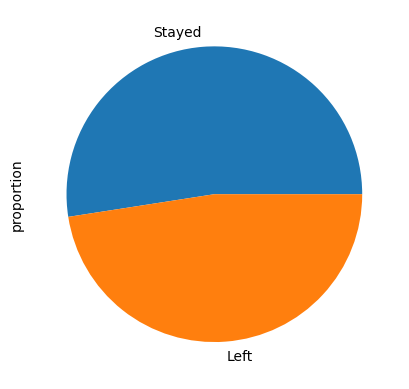

In [285]:
df['Attrition'].value_counts(normalize=True).plot(kind='pie')

In [286]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age,59598.0,38.565875,12.079673,18.0,28.0,39.0,49.0,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,7.0,13.0,23.0,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,5658.0,7354.0,8880.0,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.0,1.0,2.0,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,25.0,50.0,75.0,99.0
Number of Dependents,59598.0,1.648075,1.555689,0.0,0.0,1.0,3.0,6.0
Company Tenure,59598.0,55.758415,25.411090,2.0,36.0,56.0,76.0,128.0


## outliear

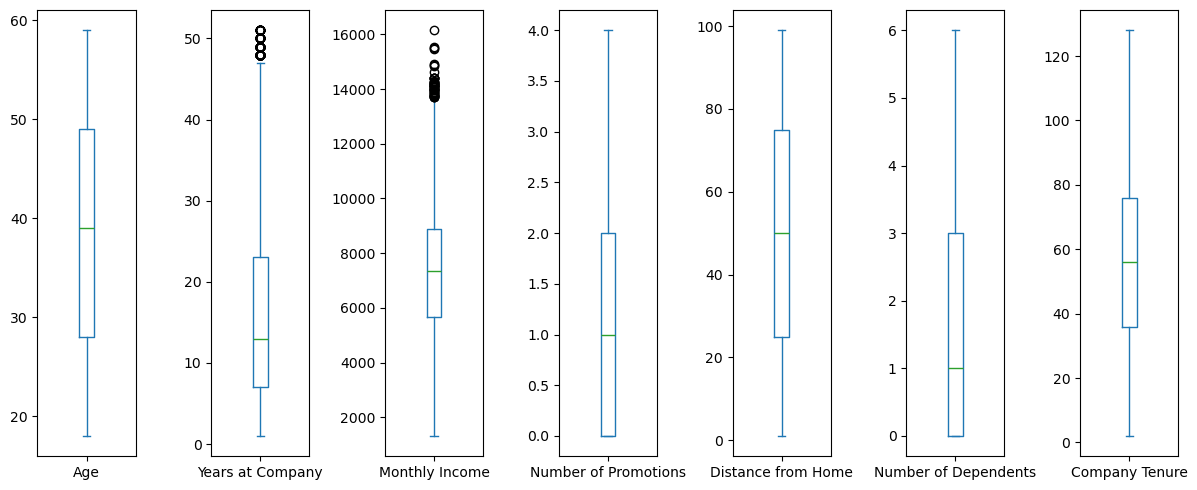

In [288]:
df.plot(kind='box',subplots=True,figsize=(12,5))
plt.tight_layout()

In [289]:
for column in df.select_dtypes(include=['number']):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1    

    # define outliers bounds
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    # filter outliers
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

# print shapes of data before and after
print('Before removing outliers: ',df_copy.shape)
print('After removing outliers: ',df.shape)
print('number of romoving outliers: ',df_copy.shape[0]-df.shape[0])

Before removing outliers:  (59598, 24)
After removing outliers:  (59276, 23)
number of romoving outliers:  322


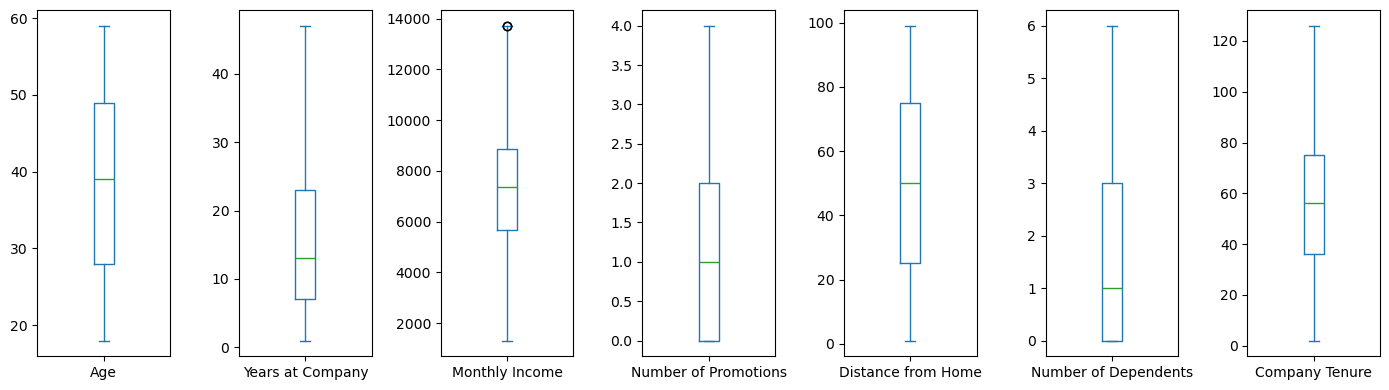

In [290]:

df.plot(kind='box', subplots=True, figsize=(14, 4))
plt.tight_layout()
plt.show()


## skewness

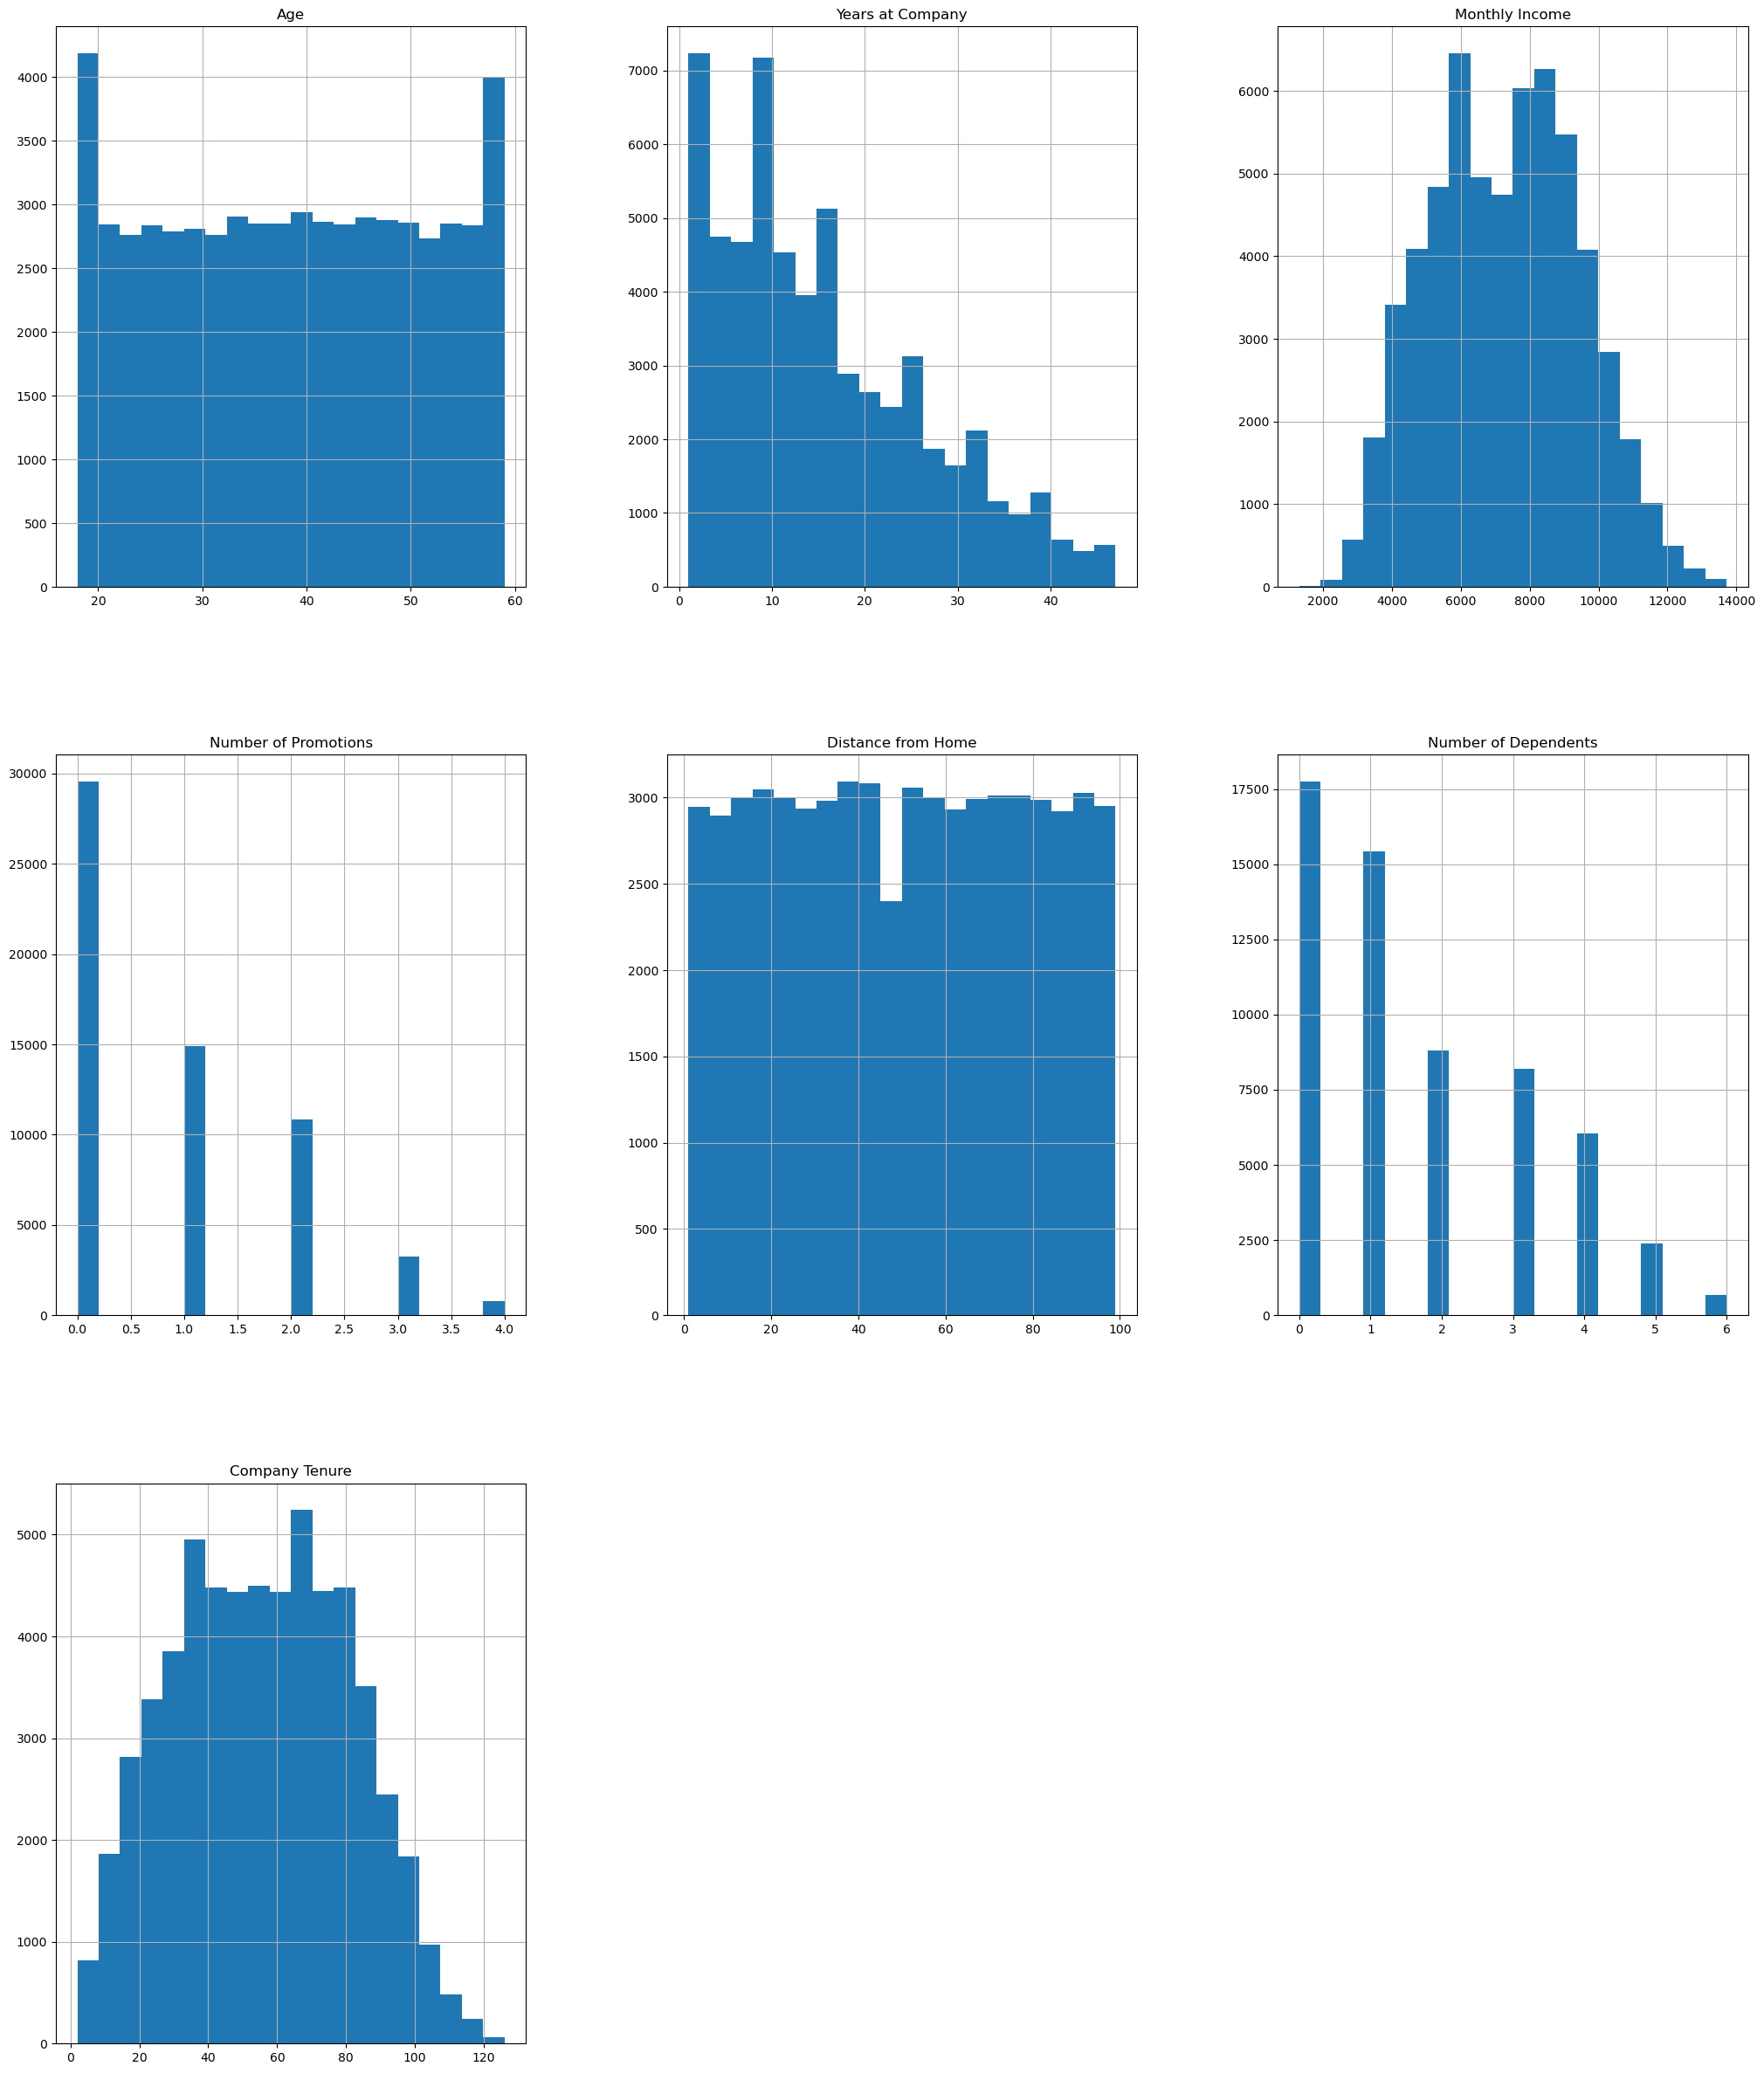

In [291]:
df.select_dtypes(include='number').hist(bins=20, figsize=(25,30))
# plt.suptitle('',fontsize=30)
plt.show()

In [292]:
skewness=df.select_dtypes(include='number').skew()    

sort_skew=skewness.sort_values(ascending=True)    # sort the skewness values 

sort_skew

Age                    -0.004544
Distance from Home      0.002308
Company Tenure          0.061951
Monthly Income          0.095831
Number of Dependents    0.715798
Years at Company        0.752051
Number of Promotions    0.993602
dtype: float64

## heatmap

In [293]:
df['Attrition'].value_counts()

Attrition
Stayed    31073
Left      28203
Name: count, dtype: int64

In [294]:
df['Attrition']=df['Attrition'].map({'Left':0,'Stayed':1})

<Axes: >

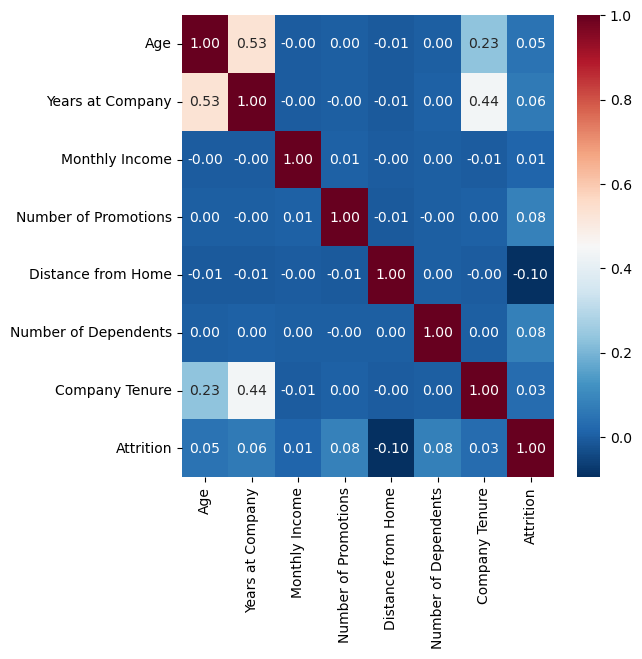

In [295]:
nume_df=df.corr(numeric_only=True) 
plt.figure(figsize=(6,6))
sns.heatmap(nume_df, annot=True, cmap='RdBu_r', fmt=".2f")

In [296]:
df[['Age','Years at Company']].corr()

,Age,Years at Company
Age,1.000000,0.531872
Years at Company,0.531872,1.000000


In [297]:

# drop column
df.drop(columns=['Age'],axis=1,inplace=True)

In [298]:
df.describe(include='O').T

,count,unique,top,freq
Gender,59276,2,Male,32569
Job Role,59276,5,Technology,15425
Work-Life Balance,59276,4,Good,22402
Job Satisfaction,59276,4,High,29611
Performance Rating,59276,4,Average,35605
Overtime,59276,2,No,39923
Education Level,59276,5,Bachelor’s Degree,17731
Marital Status,59276,3,Married,29753
Job Level,59276,3,Entry,23754
Company Size,59276,3,Medium,29589


In [299]:
# df.loc[0]

In [300]:
feature_list=df.select_dtypes(include='object').columns.tolist()

for i in feature_list:
    print(df[i].value_counts(),'\n'*2)

Gender
Male      32569
Female    26707
Name: count, dtype: int64 


Job Role
Technology    15425
Healthcare    13576
Education     12438
Media          9520
Finance        8317
Name: count, dtype: int64 


Work-Life Balance
Good         22402
Fair         17963
Excellent    10653
Poor          8258
Name: count, dtype: int64 


Job Satisfaction
High         29611
Very High    12036
Medium       11765
Low           5864
Name: count, dtype: int64 


Performance Rating
Average          35605
High             11841
Below Average     8891
Low               2939
Name: count, dtype: int64 


Overtime
No     39923
Yes    19353
Name: count, dtype: int64 


Education Level
Bachelor’s Degree    17731
Associate Degree     14840
Master’s Degree      11950
High School          11687
PhD                   3068
Name: count, dtype: int64 


Marital Status
Married     29753
Single      20729
Divorced     8794
Name: count, dtype: int64 


Job Level
Entry     23754
Mid       23613
Senior    11909
Name: cou

# encoding

In [301]:
df['Work-Life Balance']=df['Work-Life Balance'].map({'Excellent':3,'Good':2,'Fair':1,'Poor':0})
df['Job Satisfaction']=df['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
df['Performance Rating']=df['Performance Rating'].map({'Low':0,'Below Average':1,'Average':2,'High':3})
df['Education Level']=df['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelor’s Degree':2,'Master’s Degree':3,'PhD':4})
df['Job Level']=df['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})
df['Company Size']=df['Company Size'].map({'Small':0,'Medium':1,'Large':2})
df['Company Reputation']=df['Company Reputation'].map({'Excellent':3,'Good':2,'Fair':1,'Poor':0})
df['Employee Recognition']=df['Employee Recognition'].map({'Low':0,'Medium':1,'High':2,'Very High':3})

In [302]:
df.describe(include='O').T

,count,unique,top,freq
Gender,59276,2,Male,32569
Job Role,59276,5,Technology,15425
Overtime,59276,2,No,39923
Marital Status,59276,3,Married,29753
Remote Work,59276,2,No,47969
Leadership Opportunities,59276,2,No,56371
Innovation Opportunities,59276,2,No,49627


In [303]:
# Step 1: Compute mean per category
mean=df.groupby('Job Role')['Monthly Income'].mean() 

# Step 2: Map back to original DataFrame
df['Job Role']=df['Job Role'].map(mean)

In [304]:
df['Job Role'].value_counts()

Job Role
9102.172836    15425
8000.416470    13576
4498.883985    12438
5991.210609     9520
8479.180113     8317
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

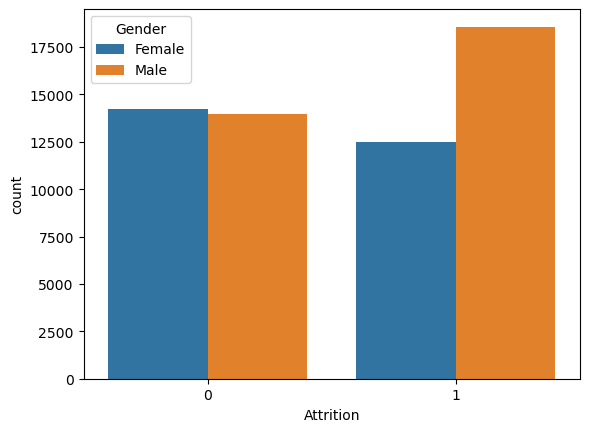

In [305]:
sns.countplot(x='Attrition', hue='Gender', data=df)

<Axes: xlabel='Marital Status', ylabel='count'>

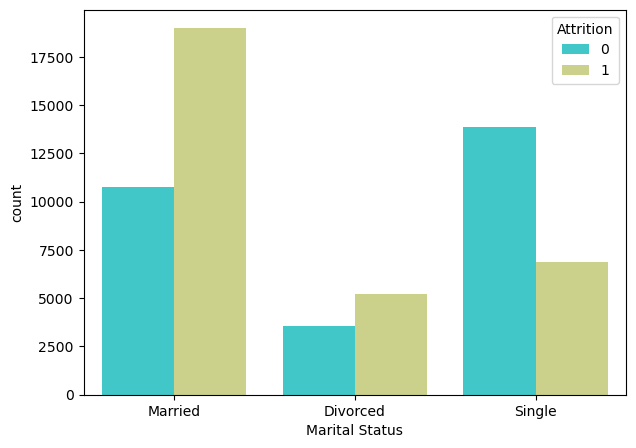

In [306]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Marital Status', hue='Attrition', palette="rainbow")
# plt.xticks(rotation=90)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59276 entries, 0 to 59597
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    59276 non-null  object 
 1   Years at Company          59276 non-null  int64  
 2   Job Role                  59276 non-null  float64
 3   Monthly Income            59276 non-null  int64  
 4   Work-Life Balance         59276 non-null  int64  
 5   Job Satisfaction          59276 non-null  int64  
 6   Performance Rating        59276 non-null  int64  
 7   Number of Promotions      59276 non-null  int64  
 8   Overtime                  59276 non-null  object 
 9   Distance from Home        59276 non-null  int64  
 10  Education Level           59276 non-null  int64  
 11  Marital Status            59276 non-null  object 
 12  Number of Dependents      59276 non-null  int64  
 13  Job Level                 59276 non-null  int64  
 14  Company Siz

In [308]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [309]:
features_list = [feature for feature in df.select_dtypes(include='object').columns]

for column in features_list:
    df[column]=LabelEncoder().fit_transform(df[column])

<Axes: >

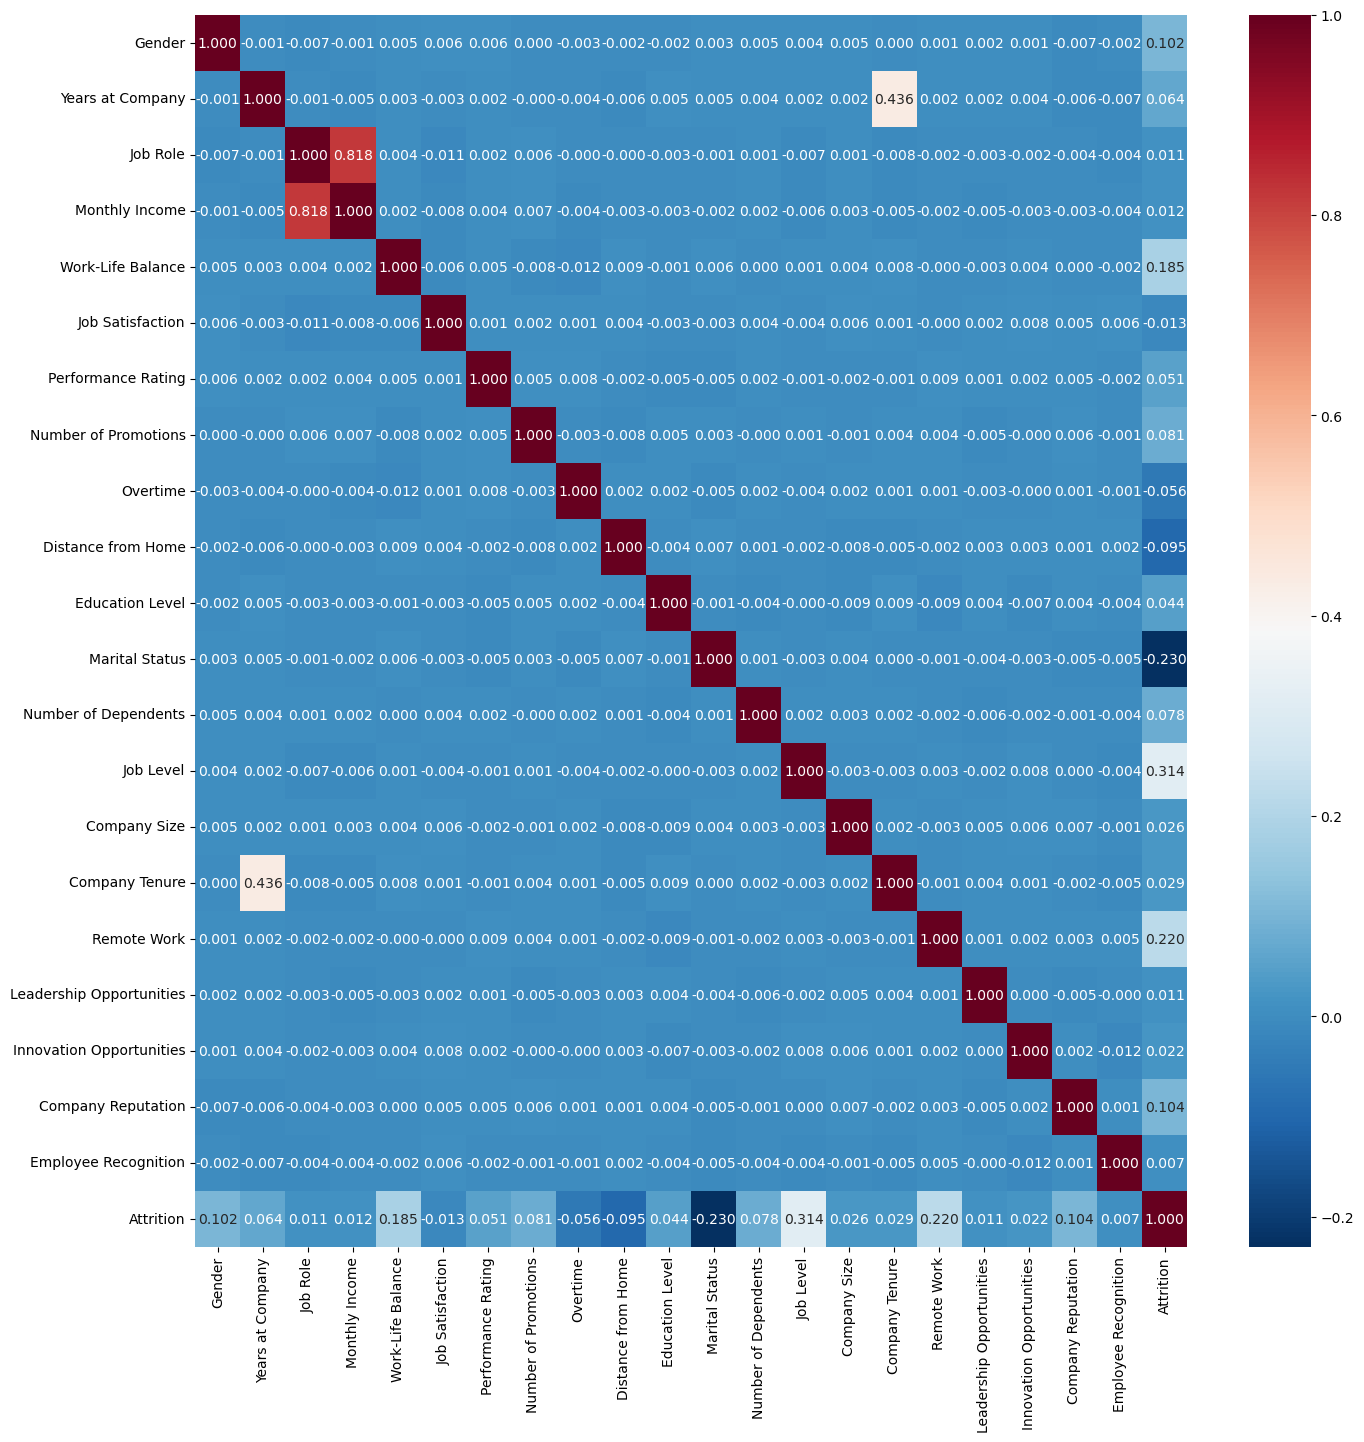

In [310]:
plt.figure(figsize=(16,16))
nume_df=df.corr(numeric_only=True) 

sns.heatmap(nume_df, annot=True, cmap='RdBu_r', fmt=".3f")

In [311]:
df[['Job Role','Monthly Income']].corr()

,Job Role,Monthly Income
Job Role,1.000000,0.818016
Monthly Income,0.818016,1.000000


In [312]:
df.drop(columns='Job Role',inplace=True,axis=1)

Feature 0: 623.740018
Feature 1: 246.390194
Feature 2: 8.308107
Feature 3: 2092.766064
Feature 4: 9.469322
Feature 5: 157.550209
Feature 6: 386.885567
Feature 7: 183.893406
Feature 8: 544.890143
Feature 9: 117.410102
Feature 10: 3309.189078
Feature 11: 367.222840
Feature 12: 6478.412806
Feature 13: 40.544467
Feature 14: 51.344989
Feature 15: 3027.090653
Feature 16: 6.549155
Feature 17: 28.341143
Feature 18: 653.036791
Feature 19: 3.045726


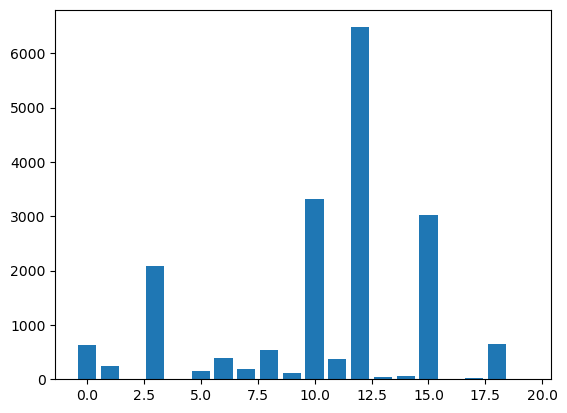

In [313]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

fs.fit(x,y)
x_fs = fs.transform(x)


import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

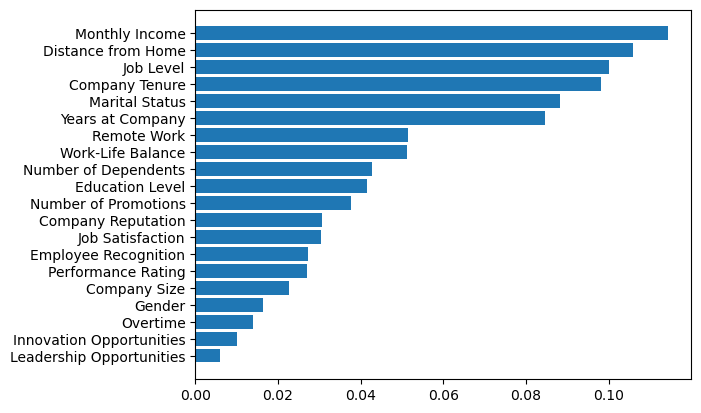

In [314]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x, y)
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x.columns)[indices])

In [315]:
df.drop(columns=['Gender','Overtime','Innovation Opportunities','Leadership Opportunities','Company Size'],axis=1,inplace=True)

In [316]:
df.drop(columns=['Company Tenure'],inplace=True,axis=1)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59276 entries, 0 to 59597
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Years at Company      59276 non-null  int64
 1   Monthly Income        59276 non-null  int64
 2   Work-Life Balance     59276 non-null  int64
 3   Job Satisfaction      59276 non-null  int64
 4   Performance Rating    59276 non-null  int64
 5   Number of Promotions  59276 non-null  int64
 6   Distance from Home    59276 non-null  int64
 7   Education Level       59276 non-null  int64
 8   Marital Status        59276 non-null  int32
 9   Number of Dependents  59276 non-null  int64
 10  Job Level             59276 non-null  int64
 11  Remote Work           59276 non-null  int32
 12  Company Reputation    59276 non-null  int64
 13  Employee Recognition  59276 non-null  int64
 14  Attrition             59276 non-null  int64
dtypes: int32(2), int64(13)
memory usage: 6.8 MB


# model

In [318]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [319]:
model=LogisticRegression(penalty='l1',solver='liblinear')

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42,stratify=y)

In [320]:
model.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [321]:
# testing

y_pre=model.predict(x_test)

In [322]:
# check

print('Accuracy: ',accuracy_score(y_test,y_pre))
print('confusion metrix: \n',confusion_matrix(y_test,y_pre),'\n')
print('recall   : ',recall_score(y_test,y_pre))
print('f1       : ',f1_score(y_test,y_pre))
print('precision: ',precision_score(y_test,y_pre))

Accuracy:  0.7269302142495642
confusion metrix: 
 [[5917 2544]
 [2312 7010]] 

recall   :  0.7519845526711006
f1       :  0.74274210637847
precision:  0.7337240946200544


## decision tree

In [323]:
from sklearn.tree import DecisionTreeClassifier

model_t=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=30,min_samples_split=2)
model_t.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30)

In [324]:
y_pre_=model.predict(x_test)

In [325]:
print('Accuracy: ',accuracy_score(y_test,y_pre_))
print('confusion metrix: \n',confusion_matrix(y_test,y_pre_),'\n')
print('recall   : ',recall_score(y_test,y_pre_))
print('f1       : ',f1_score(y_test,y_pre_))
print('precision: ',precision_score(y_test,y_pre_))

Accuracy:  0.7269302142495642
confusion metrix: 
 [[5917 2544]
 [2312 7010]] 

recall   :  0.7519845526711006
f1       :  0.74274210637847
precision:  0.7337240946200544


## Scaling

In [326]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [327]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
scaler=StandardScaler()

x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [328]:
model.fit(x_train_sc,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [329]:
# testing

y_pre=model.predict(x_test_sc)

In [330]:
print('Accuracy: ',accuracy_score(y_test,y_pre))
print('confusion metrix: \n',confusion_matrix(y_test,y_pre),'\n')
print('recall   : ',recall_score(y_test,y_pre))
print('f1       : ',f1_score(y_test,y_pre))
print('precision: ',precision_score(y_test,y_pre))

Accuracy:  0.7271551481752235
confusion metrix: 
 [[6035 2392]
 [2460 6896]] 

recall   :  0.7370671227020094
f1       :  0.7397554172924266
precision:  0.7424633936261843
